# The Hodgkin-Huxley Model Neuron

We numerically simulate the model proposed by Hodgkin and Huxley in the 1950s, describing the generation of the action potential in the giant axon of the squid.


This model is characterised by four  state-variables (i.e. the membrane potential $V(t)$, the fraction of open potassium channels $n(t)$, and the fraction of open sodium channes - as described simultaneously by two additional state variables $m(t)$ and $h(t)$).

All these variables evolve in time according to a system of *coupled* first-order ordinary differential equations, whose *external input* is the injected current (density) $I$ - here considered to be constant in time:


$C \frac{dV(t)}{dt}\ = \ G_{leak} (E_{leak} - V) + G_{Na} m^3 h (E_{Na} - V) + G_{K} n^4 (E_{K} - V) + I$

$\frac{dn}{dt}\ = \ \alpha_n (1 - n) - \beta_n n$

$\frac{dm}{dt}\ = \ \alpha_m (1 - m) - \beta_m m$

$\frac{dh}{dt}\ = \ \alpha_h (1 - h) - \beta_h h$

In [1]:
# @title Parameters of the simulation
import numpy as np
import matplotlib.pyplot as plt

T      = 300.    # Maximal lifetime of the simulation [ms]
Δt     = 0.01    # Integration time step [ms] - WATCH OUT! DO NOT INCREASE!

C      = 0.010   # This is the membrane (specific) capacitance [uF/mm^2]
gnamax = 1.2     # Max (specific) sodium conductance [mS/mm^2]
gkmax  = 0.36    # Max (specific) potassium conductance [mS/mm^2]
gl     = 0.003   # Max (specific) leak conductance [mS/mm^2]

Ena    = 50.    # Reversal potential for sodium currents [mV]
Ek     = -77.    # Reversal potential for potassium currents [mV]
El     = -54.387 # Reversal potential for leak currents [mV]

# Calculate the number of time steps using the total time and time step
N = int(T / Δt)  # Ensure N is an integer

# Generate the time array using N as the num argument
time = np.linspace(0, T, N)        # Array containing the "time" axis [ms]

In [18]:
# @title Functions to simulate the HH model
def HH(I):
  # Initialize the variables
  W = np.zeros(N)  # Array containing V as the time goes by
  Nspikes = 0      # Counter for the number of spikes

  # Initial conditions:
  V      = El
  αm = 0.1 * (V+40.) / (1. - np.exp(-(V+40.)/10.))
  βm  = 4. * np.exp(-0.0556 * (V+65))

  αn = 0.01 * (V+55) / (1. - np.exp(-(V+55.)/10.))
  βn = 0.125 * np.exp(-(V+65.)/80.)

  αh = 0.07 * np.exp(-0.05*(V+65.))
  βh = 1. / (1. + np.exp(-0.1*(V+35.)))

  m      = αm / (αm + βm)
  h      = αh / (αh + βh)
  n      = αn / (αn + βn)

  tmp    = 0        # For the peak detection

  # Euler method ---------------------------------------------------------------
  for k in range(1,N): # Loop over each discrete step for time t
     # Kinetic rates are expressed in msec
      αm = 0.1 * (V + 40.) / (1. - np.exp(-(V + 40.) / 10.))
      βm  = 4. * np.exp(-0.0556 * (V + 65))

      αn = 0.01 * (V + 55) / (1. - np.exp(-(V + 55.)/10.))
      βn = 0.125 * np.exp(-(V + 65.) / 80.)

      αh = 0.07 * np.exp(-0.05*(V + 65.))
      βh = 1. / (1. + np.exp(-0.1*(V + 35.)))

      n     = n + Δt * (αn * (1-n) - βn * n)     # Euler forward method
      m     = m + Δt * (αm * (1-m) - βm * m)     # Euler forward method
      h     = h + Δt * (αh * (1-h) - βh * h)     # Euler forward method

      Ina   = gnamax * m**3 * h * (Ena - V)       # By definition
      Ik    = gkmax  * n**4 * (Ek - V)			# By definition
      Ileak = gl     * (El - V)					# By definition

      V     = V + Δt/C * (Ina + Ik + Ileak + I)  # Euler forward method

      W[k]  = V; # Let's write the current V inside a new element of W[]


      if (tmp==0) and (V>-10):     # Detection of a "peak", with positive derivative
        tmp = 1;
        Nspikes = Nspikes + 1;
      elif (tmp==1) and (V<-10): # if negative derivative, ignore it
        tmp = 0;
    # ----------------------------------------------------------------------------

  freq = np.round(1000. * Nspikes / T)

  return W, freq


def HH2(Iext):
  # Initialize the variables
  N = len(Iext)       # Ensure N is an integer
  W = np.zeros(N)  # Array containing V as the time goes by
  Nspikes = 0      # Counter for the number of spikes

  # Initial conditions:
  V      = El
  αm = 0.1 * (V+40.) / (1. - np.exp(-(V+40.)/10.))
  βm  = 4. * np.exp(-0.0556 * (V+65))

  αn = 0.01 * (V+55) / (1. - np.exp(-(V+55.)/10.))
  βn = 0.125 * np.exp(-(V+65.)/80.)

  αh = 0.07 * np.exp(-0.05*(V+65.))
  βh = 1. / (1. + np.exp(-0.1*(V+35.)))

  m      = αm / (αm + βm)
  h      = αh / (αh + βh)
  n      = αn / (αn + βn)

  tmp    = 0        # For the peak detection

  # Euler method ---------------------------------------------------------------
  for k in range(1,N): # Loop over each discrete step for time t
     # Kinetic rates are expressed in msec
      αm = 0.1 * (V + 40.) / (1. - np.exp(-(V + 40.) / 10.))
      βm  = 4. * np.exp(-0.0556 * (V + 65))

      αn = 0.01 * (V + 55) / (1. - np.exp(-(V + 55.)/10.))
      βn = 0.125 * np.exp(-(V + 65.) / 80.)

      αh = 0.07 * np.exp(-0.05*(V + 65.))
      βh = 1. / (1. + np.exp(-0.1*(V + 35.)))

      n     = n + Δt * (αn * (1-n) - βn * n)     # Euler forward method
      m     = m + Δt * (αm * (1-m) - βm * m)     # Euler forward method
      h     = h + Δt * (αh * (1-h) - βh * h)     # Euler forward method

      Ina   = gnamax * m**3 * h * (Ena - V)       # By definition
      Ik    = gkmax  * n**4 * (Ek - V)			# By definition
      Ileak = gl     * (El - V)					# By definition

      V     = V + Δt/C * (Ina + Ik + Ileak + Iext[k])  # Euler forward method

      W[k]  = V; # Let's write the current V inside a new element of W[]


      if (tmp==0) and (V>-10):     # Detection of a "peak", with positive derivative
        tmp = 1;
        Nspikes = Nspikes + 1;
      elif (tmp==1) and (V<-10): # if negative derivative, ignore it
        tmp = 0;
    # ----------------------------------------------------------------------------

  freq = np.round(1000. * Nspikes / T)

  return W, freq





def RC(Iext):
  # Initialize the variables
  N = len(Iext)       # Ensure N is an integer
  W = np.zeros(N)  # Array containing V as the time goes by

  # Initial conditions:
  V      = El

  # Euler method ---------------------------------------------------------------
  for k in range(1,N): # Loop over each discrete step for time t
    Ileak = gl     * (El - V)					# By definition
    V     = V + Δt/C * (Ileak + Iext[k])  # Euler forward method
    W[k]  = V; # Let's write the current V inside a new element of W[]
  # ----------------------------------------------------------------------------
  return W


def RC2(Iext):
  # Initialize the variables
  N = len(Iext)       # Ensure N is an integer
  W = np.zeros(N)  # Array containing V as the time goes by
  Nspikes = 0      # Counter for the number of spikes

  # Initial conditions:
  V      = El
  αm = 0.1 * (V+40.) / (1. - np.exp(-(V+40.)/10.))
  βm  = 4. * np.exp(-0.0556 * (V+65))

  αn = 0.01 * (V+55) / (1. - np.exp(-(V+55.)/10.))
  βn = 0.125 * np.exp(-(V+65.)/80.)

  αh = 0.07 * np.exp(-0.05*(V+65.))
  βh = 1. / (1. + np.exp(-0.1*(V+35.)))

  m      = αm / (αm + βm)
  h      = αh / (αh + βh)
  n      = αn / (αn + βn)

  tmp    = 0        # For the peak detection

  # Euler method ---------------------------------------------------------------
  for k in range(1,N): # Loop over each discrete step for time t
     # Kinetic rates are expressed in msec
      αm = 0.1 * (V + 40.) / (1. - np.exp(-(V + 40.) / 10.))
      βm  = 4. * np.exp(-0.0556 * (V + 65))

      αn = 0.01 * (V + 55) / (1. - np.exp(-(V + 55.)/10.))
      βn = 0.125 * np.exp(-(V + 65.) / 80.)

      αh = 0.07 * np.exp(-0.05*(V + 65.))
      βh = 1. / (1. + np.exp(-0.1*(V + 35.)))

      n     = n + Δt * (αn * (1-n) - βn * n)     # Euler forward method
      m     = m + Δt * (αm * (1-m) - βm * m)     # Euler forward method
      h     = h + Δt * (αh * (1-h) - βh * h)     # Euler forward method

      Ina   = gnamax * m**3 * h * (Ena - V)       # By definition
      Ik    = gkmax  * n**4 * (Ek - V)			# By definition
      Ileak = gl     * (El - V)					# By definition

      V     = V + Δt/C * (0*Ina + Ik + Ileak + Iext[k])  # Euler forward method

      W[k]  = V; # Let's write the current V inside a new element of W[]


      if (tmp==0) and (V>-10):     # Detection of a "peak", with positive derivative
        tmp = 1;
        Nspikes = Nspikes + 1;
      elif (tmp==1) and (V<-10): # if negative derivative, ignore it
        tmp = 0;
    # ----------------------------------------------------------------------------

  freq = np.round(1000. * Nspikes / T)

  return W, freq



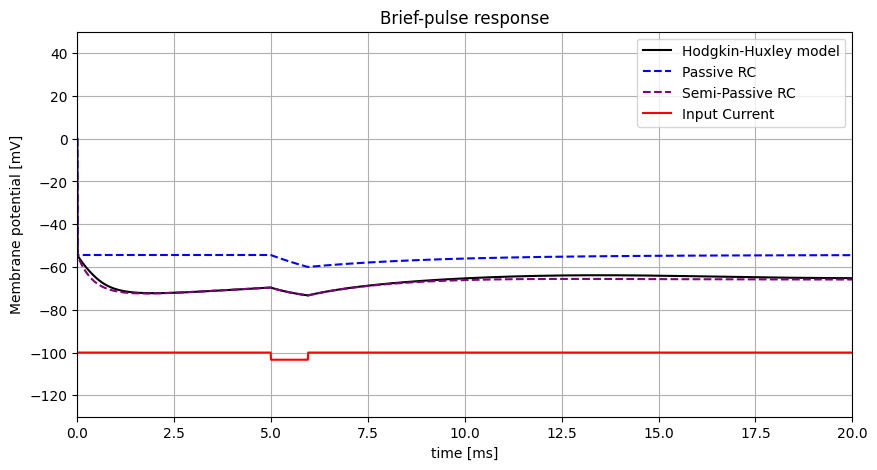

In [29]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
T = 20.
# Calculate the number of time steps using the total time and time step
N = int(T / Δt)  # Ensure N is an integer


I0 = -0.067 #@param {type:"slider", min:-0.2, max:2, step:0.0005}
T0 = 0.96 #@param {type:"slider", min:0.01, max:20, step:0.01}

delay = 5.

i1 = np.arange(0,delay,Δt)
i2 = np.arange(i1[-1] + Δt,i1[-1] + Δt + T0,Δt)
i3 = np.arange(i2[-1] + Δt,T,Δt)

M1 = len(i1)
M2 = len(i2)
M3 = len(i3)

N = M1 + M2 + M3

# Generate the time array using N as the num argument
time = np.linspace(0, T, N)        # Array containing the "time" axis [ms]

Iext = np.concatenate((np.zeros(M1), I0 * np.ones(M2), np.zeros(M3)))

W2, freq =  HH2(Iext)

#Wanalyt = RC(Iext)
Wanalyt0  = RC(Iext)
Wanalyt, _ = RC2(Iext)

fig = plt.figure(figsize=(10, 5))  # Create the figure and assign to fig
plt.plot(time, W2, label='Hodgkin-Huxley model', color='black', linestyle='-')
plt.plot(time, Wanalyt0, label='Passive RC', color='blue', linestyle='--')
plt.plot(time, Wanalyt, label='Semi-Passive RC', color='purple', linestyle='--')
plt.plot(time, (50*Iext-100), label='Input Current', color='red', linestyle='-')

plt.xlabel('time [ms]')
plt.ylabel('Membrane potential [mV]')
plt.title('Brief-pulse response')
plt.xlim([0, T])
plt.ylim([-130, 50])
plt.grid(True)
plt.legend()
plt.show()

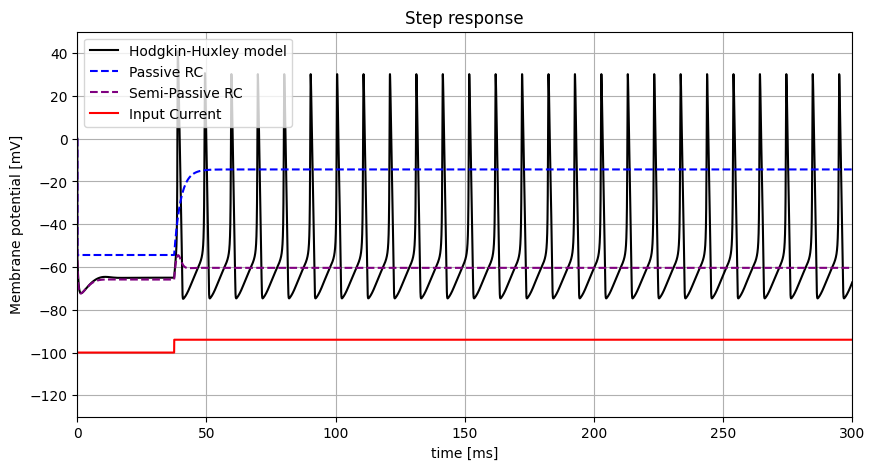

In [4]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
I0 = 0.12 #@param {type:"slider", min:-0.18, max:1.5, step:0.01}

T      = 300.    # Maximal lifetime of the simulation [ms]
N = int(T / Δt)  # Ensure N is an integer
delay = 50.
T0     = 300. + delay

i1 = np.arange(0,delay,Δt)
i2 = np.arange(i1[-1] + Δt,i1[-1] + Δt + T0,Δt)

M1 = len(i1)
M2 = len(i2)

N = M1 + M2

# Generate the time array using N as the num argument
time = np.linspace(0, T, N)        # Array containing the "time" axis [ms]

Iext = np.concatenate((np.zeros(M1), I0 * np.ones(M2)))

W2, freq =  HH2(Iext)

#Wanalyt = RC(Iext)
Wanalyt0  = RC(Iext)
Wanalyt, _ = RC2(Iext)

fig = plt.figure(figsize=(10, 5))  # Create the figure and assign to fig
plt.plot(time, W2, label='Hodgkin-Huxley model', color='black', linestyle='-')
plt.plot(time, Wanalyt0, label='Passive RC', color='blue', linestyle='--')
plt.plot(time, Wanalyt, label='Semi-Passive RC', color='purple', linestyle='--')
plt.plot(time, (50*Iext-100), label='Input Current', color='red', linestyle='-')

plt.xlabel('time [ms]')
plt.ylabel('Membrane potential [mV]')
plt.title('Step response')
plt.xlim([0, T])
plt.ylim([-130, 50])
plt.grid(True)
plt.legend()
plt.show()

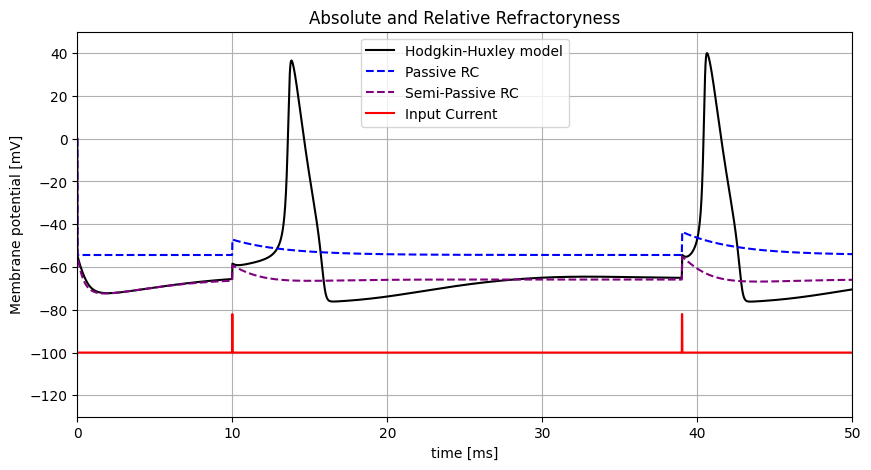

In [23]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
T = 50.
# Calculate the number of time steps using the total time and time step
N = int(T / Δt)  # Ensure N is an integer


I0 = 3.6 #@param {type:"slider", min:0, max:20, step:0.05}
I1 = 3.6 #@param {type:"slider", min:0, max:20, step:0.05}
T0 = 28.99 #@param {type:"slider", min:0.01, max:50, step:0.01}

delay = 10.

i1 = np.arange(0,delay,Δt)
i2 = np.arange(i1[-1] + Δt,i1[-1] + Δt + 2*Δt,Δt)
i3 = np.arange(i2[-1] + Δt,i2[-1] + Δt + T0,Δt)
i4 = np.arange(i3[-1] + Δt,i3[-1] + Δt + 2*Δt,Δt)
i5 = np.arange(i4[-1] + Δt,T,Δt)

M1 = len(i1)
M2 = len(i2)
M3 = len(i3)
M4 = len(i4)
M5 = len(i5)

N = M1 + M2 + M3 + M4 + M5

# Generate the time array using N as the num argument
time = np.linspace(0, T, N)        # Array containing the "time" axis [ms]

Iext = np.concatenate((np.zeros(M1), I0 * np.ones(M2), np.zeros(M3), I1 * np.ones(M4), np.zeros(M5)))

W2, freq =  HH2(Iext)

#Wanalyt = RC(Iext)
Wanalyt0  = RC(Iext)
Wanalyt, _ = RC2(Iext)

fig = plt.figure(figsize=(10, 5))  # Create the figure and assign to fig
plt.plot(time, W2, label='Hodgkin-Huxley model', color='black', linestyle='-')
plt.plot(time, Wanalyt0, label='Passive RC', color='blue', linestyle='--')
plt.plot(time, Wanalyt, label='Semi-Passive RC', color='purple', linestyle='--')
plt.plot(time, (5*Iext-100), label='Input Current', color='red', linestyle='-')

plt.xlabel('time [ms]')
plt.ylabel('Membrane potential [mV]')
plt.title('Absolute and Relative Refractoryness')
plt.xlim([0, T])
plt.ylim([-130, 50])
plt.grid(True)
plt.legend()
plt.show()

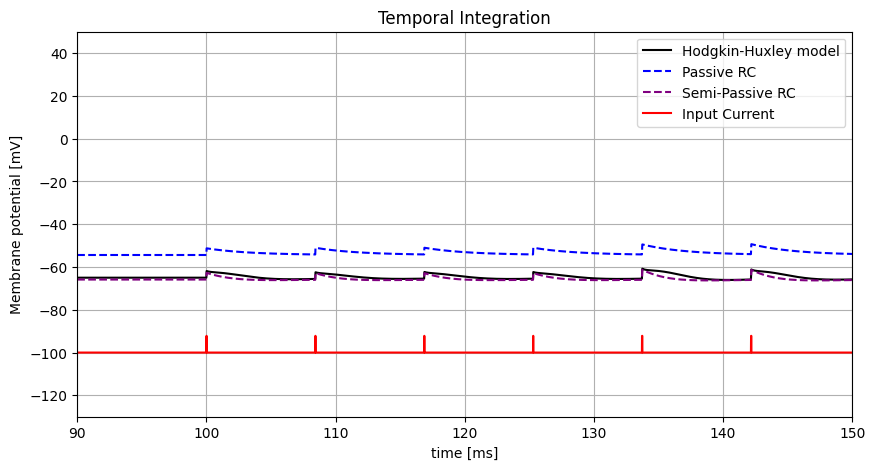

In [26]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }
T = 1000.
# Calculate the number of time steps using the total time and time step
N = int(T / Δt)  # Ensure N is an integer


I0 = 1.562 #@param {type:"slider", min:0, max:5, step:0.001}
T0 = 8.4 #@param {type:"slider", min:0.1, max:50, step:0.1}

delay = 100.

i1 = np.arange(0,delay,Δt)
i2 = np.arange(i1[-1] + Δt,i1[-1] + Δt + 2*Δt,Δt)
i3 = np.arange(i2[-1] + Δt,i2[-1] + Δt + T0,Δt)
i4 = np.arange(i3[-1] + Δt,i3[-1] + Δt + 2*Δt,Δt)
i5 = np.arange(i4[-1] + Δt,i4[-1] + Δt + T0,Δt)
i6 = np.arange(i5[-1] + Δt,i5[-1] + Δt + 2*Δt,Δt)
i7 = np.arange(i6[-1] + Δt,i6[-1] + Δt + T0,Δt)
i8 = np.arange(i7[-1] + Δt,i7[-1] + Δt + 2*Δt,Δt)
i9 = np.arange(i8[-1] + Δt,i8[-1] + Δt + T0,Δt)
i10 = np.arange(i9[-1] + Δt,i9[-1] + Δt + 2*Δt,Δt)
i11 = np.arange(i10[-1] + Δt,i10[-1] + Δt + T0,Δt)
i12 = np.arange(i11[-1] + Δt,i11[-1] + Δt + 2*Δt,Δt)
i13 = np.arange(i12[-1] + Δt,500-(delay+6*2*Δt+5*T0),Δt)

M1 = len(i1)
M2 = len(i2)
M3 = len(i3)
M4 = len(i4)
M5 = len(i5)
M6 = len(i6)
M7 = len(i7)
M8 = len(i8)
M9 = len(i9)
M10 = len(i10)
M11 = len(i11)
M12 = len(i12)
M13 = len(i13)

N = M1 + M2 + M3 + M4 + M5 + M6 + M7 + M8 + M9 + M10 + M11 + M12 + M13


Iext = np.concatenate((np.zeros(M1), I0 * np.ones(M2), np.zeros(M3), I0* np.ones(M4), np.zeros(M5), I0* np.ones(M6), np.zeros(M7), I0* np.ones(M8), np.zeros(M9), I0* np.ones(M10), np.zeros(M11), I0* np.ones(M12), np.zeros(M13)))
T = N * Δt
# Generate the time array using N as the num argument
time = np.linspace(0, T, N)        # Array containing the "time" axis [ms]

W2, freq =  HH2(Iext)

#Wanalyt = RC(Iext)
Wanalyt0  = RC(Iext)
Wanalyt, _ = RC2(Iext)

fig = plt.figure(figsize=(10, 5))  # Create the figure and assign to fig
plt.plot(time, W2, label='Hodgkin-Huxley model', color='black', linestyle='-')
plt.plot(time, Wanalyt0, label='Passive RC', color='blue', linestyle='--')
plt.plot(time, Wanalyt, label='Semi-Passive RC', color='purple', linestyle='--')
plt.plot(time, (5*Iext-100), label='Input Current', color='red', linestyle='-')

plt.xlabel('time [ms]')
plt.ylabel('Membrane potential [mV]')
plt.title('Temporal Integration')
plt.xlim([90, 150])
plt.ylim([-130, 50])
plt.grid(True)
plt.legend()
plt.show()